In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd

In [2]:
import os

# 获取当前工作目录
current_directory = os.getcwd()

print("Current working directory:", current_directory)

Current working directory: /disk2/cai045/STATE/try/data


In [3]:
# reload dataset
adata = sc.read_h5ad('/disk2/cai045/STATE/try/data/combined_7VEXA_REDEEM_GMP.h5ad.h5ad')

In [4]:
adata.obs

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,project.name.x,cell_type,STD.CellType,cell_type_ontology_term_id,Sample,project.name.y,...,pct_counts_ribo,total_counts_hb,log1p_total_counts_hb,pct_counts_hb,leiden,group,major_celltype,Prediction,Probability,barcode
barcode,,,,,,,,,,,,,,,,,,,,,
rd_Young2.All_AAACAGCCAACCCTCC-3,Young2.All_AAACAGCCAACCCTCC-3,rd,4490.000000,2329,Young2.All,granulocyte monocyte progenitor cell,GMP,CL:0000557,DN9_HSC,Young2.All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rd_Young2.All_AAACAGCCAACCCTCC-3
rd_Young2.All_AAACAGCCATTAAAGG-2,Young2.All_AAACAGCCATTAAAGG-2,rd,3516.000000,2189,Young2.All,granulocyte monocyte progenitor cell,GMP,CL:0000557,DN9_HSPC,Young2.All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rd_Young2.All_AAACAGCCATTAAAGG-2
rd_Young2.All_AAACCAACATTGTGTG-3,Young2.All_AAACCAACATTGTGTG-3,rd,7533.000000,3148,Young2.All,granulocyte monocyte progenitor cell,GMP,CL:0000557,DN9_HSC,Young2.All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rd_Young2.All_AAACCAACATTGTGTG-3
rd_Young2.All_AAACCGAAGGACAATG-3,Young2.All_AAACCGAAGGACAATG-3,rd,9170.000000,3679,Young2.All,granulocyte monocyte progenitor cell,GMP,CL:0000557,DN9_HSC,Young2.All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rd_Young2.All_AAACCGAAGGACAATG-3
rd_Young2.All_AAACCGCGTAGGATTT-2,Young2.All_AAACCGCGTAGGATTT-2,rd,10412.000000,3974,Young2.All,granulocyte monocyte progenitor cell,GMP,CL:0000557,DN9_HSPC,Young2.All,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rd_Young2.All_AAACCGCGTAGGATTT-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vx_PT9_BM_TTTCCTCTCTACCTGC.13,NaN,vx,-83.020410,138,NaN,granulocyte monocyte progenitor cell,NaN,NaN,NaN,NaN,...,15.248401,4.0,1.609438,0.196754,5.0,sample_13,Macrophages,granulocyte monocyte progenitor cell,0.473402,vx_PT9_BM_TTTCCTCTCTACCTGC.13
vx_PT9_BM_TTTGCGCTCTAGAGTC.13,NaN,vx,49.247648,376,NaN,granulocyte monocyte progenitor cell,NaN,NaN,NaN,NaN,...,38.490114,2.0,1.098612,0.007989,7.0,sample_13,HSC,granulocyte monocyte progenitor cell,0.438096,vx_PT9_BM_TTTGCGCTCTAGAGTC.13
vx_PT9_BM_TTTGGTTAGGAGTCTG.13,NaN,vx,-275.037232,90,NaN,granulocyte monocyte progenitor cell,NaN,NaN,NaN,NaN,...,17.073171,2.0,1.098612,0.375235,7.0,sample_13,HSC,granulocyte monocyte progenitor cell,0.694557,vx_PT9_BM_TTTGGTTAGGAGTCTG.13


In [ ]:
# 过滤细胞和基因 
sc.pp.filter_cells(adata, min_genes=200) 
sc.pp.filter_genes(adata, min_cells=3) 
# 计算总counts并添加到观察值注释中 
adata.obs['total_counts'] = adata.X.sum(axis=1).A1 
#归一化数据 
sc.pp.normalize_total(adata, target_sum=1e4) 
sc.pp.log1p(adata) 

#这些之前都做过了 就不跑了

In [5]:
# load cell metadata:
cell_meta = pd.read_csv("filtered_cell_metadata.csv")

In [6]:
adata.obs=cell_meta
adata.obs.index=adata.obs["barcode"]

In [7]:
adata.obs

,barcode,celltype,group
barcode,,,
rd_Young2.All_AAACAGCCAACCCTCC-3,rd_Young2.All_AAACAGCCAACCCTCC-3,granulocyte monocyte progenitor cell,0
rd_Young2.All_AAACAGCCATTAAAGG-2,rd_Young2.All_AAACAGCCATTAAAGG-2,granulocyte monocyte progenitor cell,0
rd_Young2.All_AAACCAACATTGTGTG-3,rd_Young2.All_AAACCAACATTGTGTG-3,granulocyte monocyte progenitor cell,0
rd_Young2.All_AAACCGAAGGACAATG-3,rd_Young2.All_AAACCGAAGGACAATG-3,granulocyte monocyte progenitor cell,0
rd_Young2.All_AAACCGCGTAGGATTT-2,rd_Young2.All_AAACCGCGTAGGATTT-2,granulocyte monocyte progenitor cell,0
...,...,...,...
vx_PT9_BM_TTTCCTCTCTACCTGC.13,vx_PT9_BM_TTTCCTCTCTACCTGC.13,granulocyte monocyte progenitor cell,1
vx_PT9_BM_TTTGCGCTCTAGAGTC.13,vx_PT9_BM_TTTGCGCTCTAGAGTC.13,granulocyte monocyte progenitor cell,1
vx_PT9_BM_TTTGGTTAGGAGTCTG.13,vx_PT9_BM_TTTGGTTAGGAGTCTG.13,granulocyte monocyte progenitor cell,1


/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


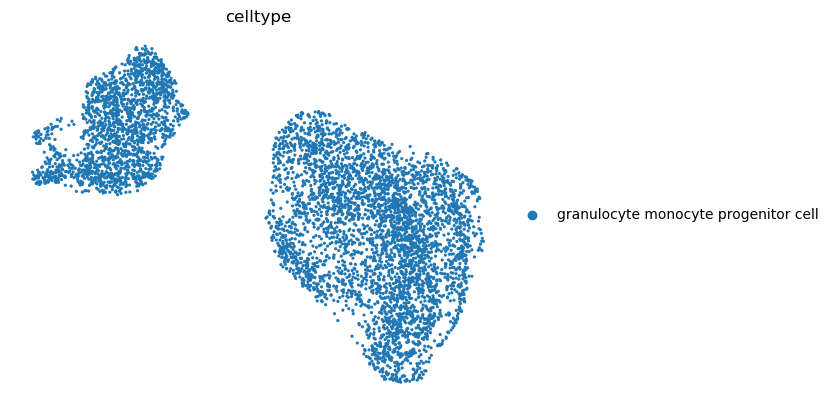

In [8]:
# 识别高变基因 
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=2000) 

# 只保留高变基因用于进一步分析 
#adata = adata[:, adata.var['highly_variable']]

sc.pp.pca(adata, n_comps=50) # 选择前50个主成分，可根据实际情况调整

sc.pp.neighbors(adata, n_pcs=50) # 基于PCA结果构建邻居图 sc.tl.umap(adata)

# 运行 UMAP
sc.tl.umap(adata)
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['celltype'], frameon=False, save=True)


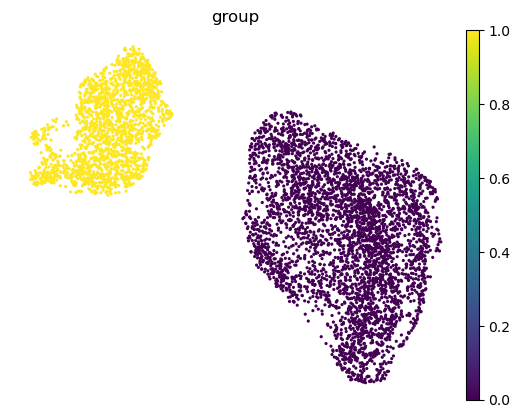

In [10]:
sc.pl.umap(adata, color=['group'], frameon=False, save=False)

In [11]:
# save dataset as anndata format
adata.write('/disk2/cai045/STATE/try/data/VEXAS_GMP.h5ad')

## 由于显存限制 需要减少细胞数

In [12]:
# 随机抽样25%的细胞
sc.pp.subsample(adata, fraction=0.25, random_state=42)

In [14]:
adata.X = adata.X.toarray()  # 稀疏转稠密

In [15]:
type(adata.X)

numpy.ndarray

In [17]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var.highly_variable]

/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/scanpy/_utils/__init__.py:553: RuntimeWarning: overflow encountered in multiply
  return x * y
/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/scanpy/preprocessing/_utils.py:41: RuntimeWarning: overflow encountered in square
  var = mean_sq - mean**2
/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/scanpy/preprocessing/_utils.py:41: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2
/disk2/cai045/anaconda3/envs/mellon/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


In [18]:
# 3. 确保扰动列是字符串类型
adata.obs['group'] = adata.obs['group'].astype(str)


/tmp/ipykernel_1100323/2897980593.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['group'] = adata.obs['group'].astype(str)


In [19]:
# save dataset as anndata format
adata.write('/disk2/cai045/STATE/try/data/VEXAS_GMP.h5ad')